In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df=pd.read_csv('Amazon Sale Report.csv',encoding= 'latin-1', parse_dates=['Date'])
df

,index,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,2022-05-31,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,128971,2022-05-31,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,128972,2022-05-31,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,128973,2022-05-31,Shipped,Amazon,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [13]:
df['Year']= df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day

In [14]:
df.drop(columns=['index','ASIN', 'ship-country','Date'], inplace=True)

In [15]:
df.columns

Index(['Status', 'Fulfilment', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'promotion-ids', 'B2B',
       'fulfilled-by', 'Year', 'Month', 'Day'],
      dtype='object')

### Which fulfillment method (e.g., FBA, FBM) has the highest sales volume and revenue? What are the top-selling categories and styles? Are there any particular trends or preferences among customers?

In [16]:
sales_by_fulfillment = df.groupby('fulfilled-by').agg({'Qty': 'sum', 'Amount': 'sum'})


In [17]:
highest_volume_fulfillment = sales_by_fulfillment['Qty'].idxmax()
highest_revenue_fulfillment = sales_by_fulfillment['Amount'].idxmax()

print("Fulfillment Method with the Highest Sales Volume:", highest_volume_fulfillment)
print("Fulfillment Method with the Highest Revenue:", highest_revenue_fulfillment)


Fulfillment Method with the Highest Sales Volume: Easy Ship
Fulfillment Method with the Highest Revenue: Easy Ship


In [18]:
sales_by_category = df.groupby('Category').agg({'Qty': 'sum', 'Amount': 'sum'})


In [19]:
top_selling_categories_volume = sales_by_category.sort_values('Qty', ascending=False).head(10)
top_selling_categories_revenue = sales_by_category.sort_values('Amount', ascending=False).head(10)

print("Top Selling Categories by Sales Volume:")
print(top_selling_categories_volume)

print("Top Selling Categories by Revenue:")
print(top_selling_categories_revenue)


Top Selling Categories by Sales Volume:
                 Qty       Amount
Category                         
Set            45289  39204124.03
kurta          45045  21299546.70
Western Dress  13943  11216072.69
Top             9903   5347792.30
Ethnic Dress    1053    791217.66
Blouse           863    458408.18
Bottom           398    150667.98
Saree            152    123933.76
Dupatta            3       915.00
Top Selling Categories by Revenue:
                 Qty       Amount
Category                         
Set            45289  39204124.03
kurta          45045  21299546.70
Western Dress  13943  11216072.69
Top             9903   5347792.30
Ethnic Dress    1053    791217.66
Blouse           863    458408.18
Bottom           398    150667.98
Saree            152    123933.76
Dupatta            3       915.00


In [21]:
sales_by_style = df.groupby('Style').agg({'Qty': 'sum', 'Amount': 'sum'})

In [23]:
top_selling_styles_volume = sales_by_style.sort_values('Qty', ascending=False).head(10)
top_selling_styles_revenue =sales_by_style.sort_values('Amount', ascending=False).head(10)

print("Top Selling Styles by Sales Volume:")
print(top_selling_styles_volume)

print("Top Selling Styles by Revenue:")
print(top_selling_styles_revenue)


Top Selling Styles by Sales Volume:
          Qty      Amount
Style                    
JNE3797  3692  2933482.00
JNE3405  2067   846822.36
SET268   1731  1303923.56
J0230    1710  1944948.48
J0341    1471  1275322.87
J0003    1390   981973.75
SET324   1152   720096.82
SET345   1134   723402.79
JNE3373  1070   403863.95
JNE3399   971   427373.22
Top Selling Styles by Revenue:
          Qty      Amount
Style                    
JNE3797  3692  2933482.00
J0230    1710  1944948.48
SET268   1731  1303923.56
J0341    1471  1275322.87
J0003    1390   981973.75
JNE3405  2067   846822.36
J0008     762   819169.96
SET345   1134   723402.79
SET324   1152   720096.82
SET278    485   719791.48


### How does the shipping service level impact sales? Is there a correlation between faster shipping and higher sales?

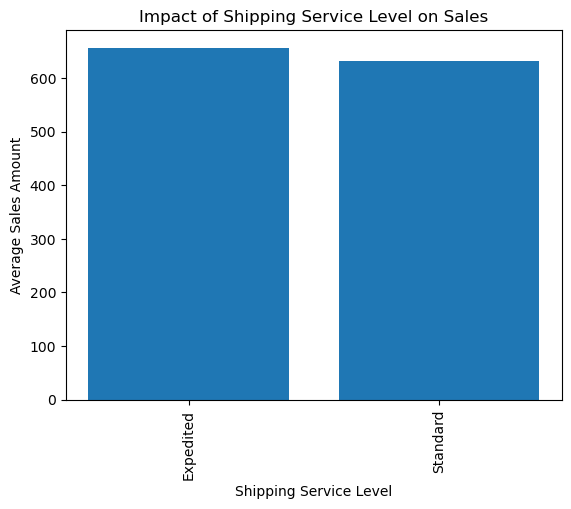

In [32]:
sales_by_shipping_service = df.groupby('ship-service-level')['Amount'].mean()

plt.bar(sales_by_shipping_service.index, sales_by_shipping_service.values)
plt.xlabel('Shipping Service Level')
plt.ylabel('Average Sales Amount')
plt.title('Impact of Shipping Service Level on Sales')
plt.xticks(rotation=90)
plt.show()

### Are there any significant differences in sales between different regions (cities/states)? Which locations have the highest sales?

In [34]:
sales_by_region = df.groupby(['ship-city', 'ship-state'])['Amount'].sum()
top_sales_locations = sales_by_region.sort_values(ascending=False).head(10)

print("Locations with the Highest Sales:")
print(top_sales_locations)


Locations with the Highest Sales:
ship-city  ship-state   
BENGALURU  KARNATAKA        6849664.99
HYDERABAD  TELANGANA        4941131.82
MUMBAI     MAHARASHTRA      3704461.80
NEW DELHI  DELHI            3608136.83
CHENNAI    TAMIL NADU       3098745.74
PUNE       MAHARASHTRA      2338518.18
KOLKATA    WEST BENGAL      1414978.87
GURUGRAM   HARYANA          1221618.74
THANE      MAHARASHTRA      1004355.29
LUCKNOW    UTTAR PRADESH     933926.34
Name: Amount, dtype: float64


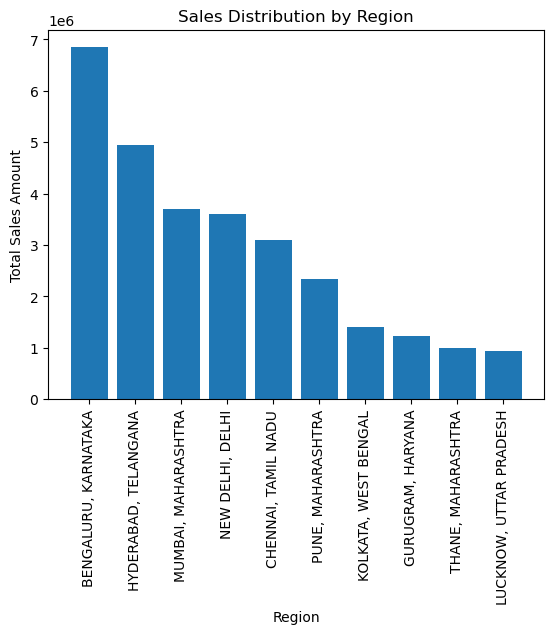

Locations with the Highest Sales:
      ship-city     ship-state      Amount
792   BENGALURU      KARNATAKA  6849664.99
2973  HYDERABAD      TELANGANA  4941131.82
4897     MUMBAI    MAHARASHTRA  3704461.80
5499  NEW DELHI          DELHI  3608136.83
1503    CHENNAI     TAMIL NADU  3098745.74
6285       PUNE    MAHARASHTRA  2338518.18
3800    KOLKATA    WEST BENGAL  1414978.87
2682   GURUGRAM        HARYANA  1221618.74
7757      THANE    MAHARASHTRA  1004355.29
4494    LUCKNOW  UTTAR PRADESH   933926.34


In [37]:
sales_by_region = sales_by_region.reset_index()
top_sales_locations = sales_by_region.sort_values('Amount', ascending=False).head(10)
plt.bar(top_sales_locations['ship-city'] + ', ' + top_sales_locations['ship-state'], top_sales_locations['Amount'])
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.xticks(rotation=90)
plt.show()

print("Locations with the Highest Sales:")
print(top_sales_locations)


### How do promotional campaigns impact sales? Can you identify any specific promotions that drive higher revenue?

In [45]:
sales_by_promotion = df.groupby('promotion-ids')['Amount'].sum()
top_revenue_promotions = sales_by_promotion.sort_values(ascending=False).head(10)


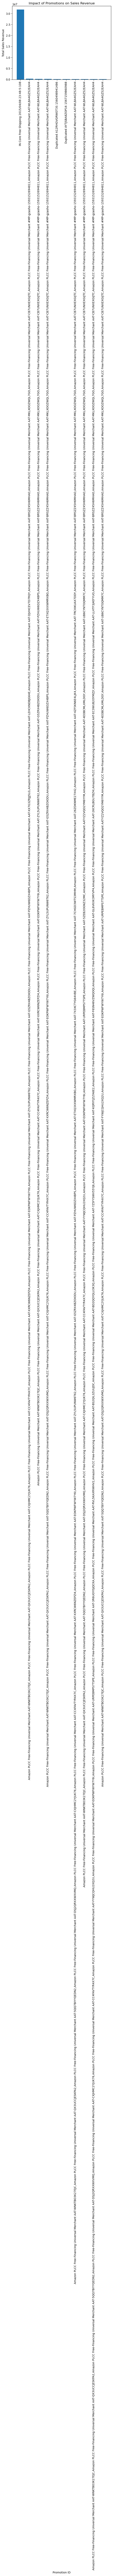

In [40]:
plt.bar(top_revenue_promotions.index, top_revenue_promotions.values)
plt.xlabel('Promotion ID')
plt.ylabel('Total Sales Revenue')
plt.title('Impact of Promotions on Sales Revenue')
plt.xticks(rotation=90)
plt.show()


### Is there a correlation between the quantity of items sold and the revenue generated? Do certain products have higher sales despite a lower quantity sold?

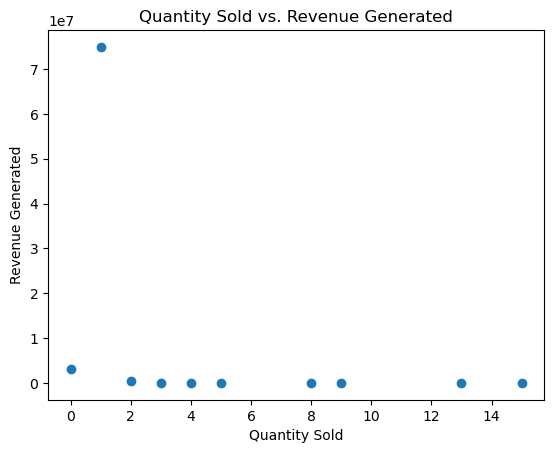

In [42]:
revenue_by_quantity = df.groupby('Qty')['Amount'].sum()
plt.scatter(revenue_by_quantity.index, revenue_by_quantity.values)
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue Generated')
plt.title('Quantity Sold vs. Revenue Generated')
plt.show()


In [43]:
average_revenue_per_item = df.groupby('SKU')['Amount'].mean()
top_sales_products = average_revenue_per_item.sort_values(ascending=False).head(10)

print("Products with Higher Sales Despite Lower Quantity Sold:")
print(top_sales_products)


Products with Higher Sales Despite Lower Quantity Sold:
SKU
J0238-LCD-S       2458.820000
J0238-LCD-XS      2442.000000
J0238-LCD-L       2327.250000
J0238-LCD-XXXL    1985.000000
J0238-LCD-XL      1960.666667
J0228-SKD-XXXL    1695.100000
J0011-LCD-A-L     1695.000000
J0228-SKD-L       1694.500000
J0228-SKD-XXL     1681.333333
J0011-LCD-XXL     1673.750000
Name: Amount, dtype: float64


### Are there any notable differences in sales between B2B (business-to-business) and B2C (business-to-consumer) transactions?

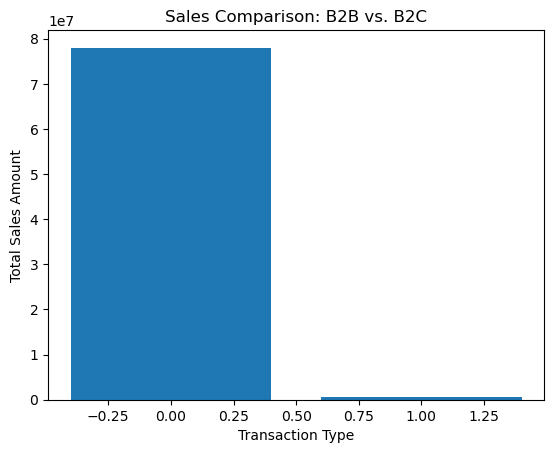

In [44]:
sales_by_transaction_type = df.groupby('B2B')['Amount'].sum()
plt.bar(sales_by_transaction_type.index, sales_by_transaction_type.values)
plt.xlabel('Transaction Type')
plt.ylabel('Total Sales Amount')
plt.title('Sales Comparison: B2B vs. B2C')
plt.show()


### What is the overall sales performance of the Amazon products during different months?

In [59]:
df.Month.replace({1:'January',2:'February', 3:'March', 4:'April', 5:'May',6: 'June',7: 'July', 8:'August', 9:'September',10:'October', 11:'November',12: 'December'}, inplace=True)

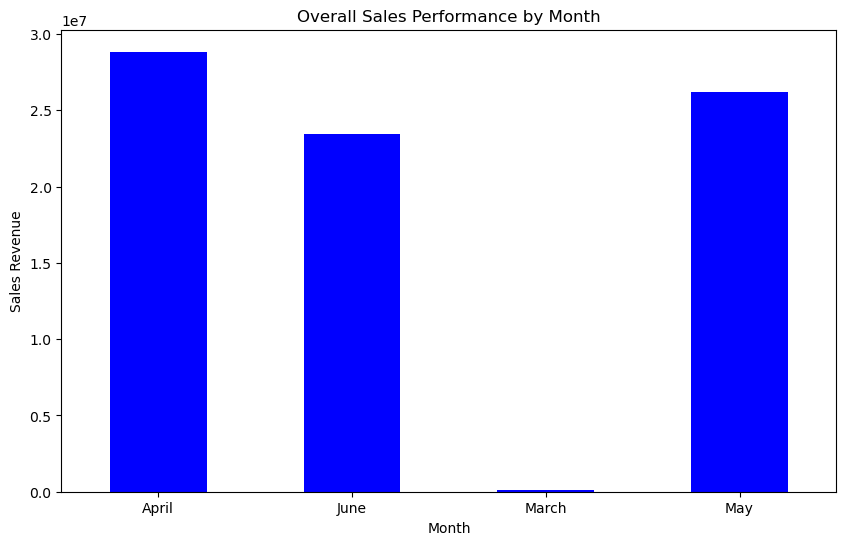

In [74]:

monthly_sales = df.groupby(df['Month'])['Amount'].sum()


plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('Overall Sales Performance by Month')
plt.xticks(rotation=0)
plt.show()


### How does the order quantity vary across different categories and sizes?

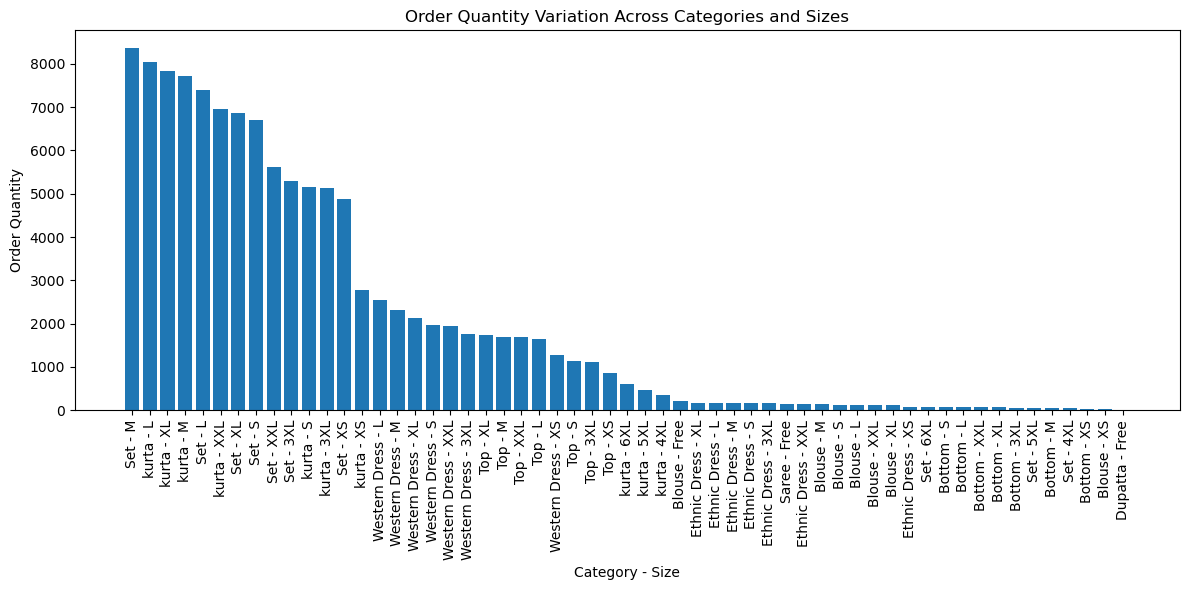

In [81]:
category_size_quantity = df.groupby(['Category', 'Size'])['Qty'].sum().reset_index()

category_size_quantity = category_size_quantity.sort_values('Qty', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(range(len(category_size_quantity)), category_size_quantity['Qty'])
plt.xticks(range(len(category_size_quantity)), category_size_quantity['Category'] + ' - ' + category_size_quantity['Size'], rotation=90)
plt.xlabel('Category - Size')
plt.ylabel('Order Quantity')
plt.title('Order Quantity Variation Across Categories and Sizes')
plt.tight_layout()
plt.show()


In [83]:
df['fulfilled-by'].value_counts()

Easy Ship    39275
Name: fulfilled-by, dtype: int64